In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [126]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [127]:
df = pd.DataFrame(x_train)
df["label"] = y_train

df1 = pd.DataFrame(x_test)
df1["label"] = y_test

df = pd.concat([df , df1] , axis = 0)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [100]:
df.shape

(70000, 785)

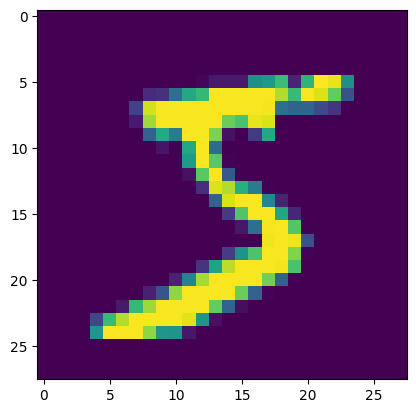

In [101]:
plt.imshow(x_train[0].reshape(28,28))

In [102]:
df.shape

(70000, 785)

In [103]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [128]:
X = df.drop("label" , axis = 1)
y = df["label"]

In [105]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [107]:
X_train.shape

(56000, 784)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , knn.predict(X_test))

0.9700714285714286

# **Using PCA**

In [137]:
### Step 1 : Mean Centric using sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
## Step 2 :
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(56000, 200)

In [139]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf , y_train)

KNeighborsClassifier()

In [140]:
y_pred = knn.predict(X_test_trf)

In [141]:
accuracy_score(y_test,y_pred)

0.9550714285714286

In [ ]:
res = {}
for i in range(1,784):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)
  knn = KNeighborsClassifier()
  knn.fit(X_train_trf , y_train)
  y_pred = knn.predict(X_test_trf)

  res[i] = accuracy_score(y_test,y_pred)
  if i%100 == 0:
    print(i)

key = max(res)

print(key , res[key])